In [1024]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import os
import unicodedata
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sb 

> ГОООООООООООЛ

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **Я, во время выполнения проекта (наверное)**

# 1. Собираем датасет

### Преобразуем потребление в литрах в подушевое

In [532]:
regions = set(pd.read_excel('Data/wealth/2014-2022.xlsx')['Регион'].dropna())

In [808]:
regions

{'Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Архангельская область без автономного округа',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Дальневосточный федеральный округ',
 'Еврейская автономная область',
 'Забайкальский край',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкарская Республика',
 'Калининградская область',
 'Калужская область',
 'Камчатский край',
 'Карачаево-Черкесская Республика',
 'Кемеровская область',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Магаданская область',
 'Московская область',
 'Мурманская область',
 'Ненецкий автономный округ',
 'Нижегородская область ',
 'Новгородская область',
 'Новосибирская область ',
 'Омская область',
 'Оренбургская область',
 'Орло

In [533]:
def fix_naming(regions, reg_input):
    namings = set(['область','автономный', 'федеральный', 'республика', 'край', 'Федерация', 'Федерация,', 'Республика', 'г.', 'округ', 'в', 'том', 'числе', 'без', 'край', ' '])
    dict_out = {}
    for item in regions:
        for jtem in reg_input:
            try:
                if (((set(item.split(' ')) - namings) & (set(jtem.split(' ')) - namings)) != set()) & (jtem != ' '):
                    dict_out[jtem] = item.replace('p', 'р', len(item)).replace('P', 'Р', len(item))
            except:
                continue
    return dict_out

In [534]:
def rename_regs(df, dict):
    return df.replace({'Регион':dict})

In [535]:
def make_df(path, regions):
    if path.endswith('.xlsx'):
        df = pd.read_excel(path).rename(columns={'Unnamed: 0': 'Регион', 'Column1':'Регион'})
    elif path.endswith('.csv'):
        df = pd.read_csv(path).drop('Unnamed: 0', axis=1)
    df = rename_regs(df, fix_naming(regions, set(df['Регион'])))
    
    df.loc[:, df.columns != 'Регион'] = df.loc[:, df.columns != 'Регион'].map(lambda x: pd.to_numeric(re.sub(r"\s+", '', str(x)).replace(',', '.'), errors='coerce'))
    df['Регион'] = df['Регион'].apply(lambda x: str(x).replace('p', 'р').replace('P', 'Р'))
    return df.dropna()

In [617]:
df1 = make_df('Data/quant/2002-2006.csv', regions)
df2 = make_df('Data/2006.csv', regions)
df3 = make_df('Data/raw/2006.xlsx', regions)
df = df1[df1['Год']==2006].merge(df2, on='Регион').merge(df3, on='Регион')
conv_frame = pd.DataFrame()
conv_frame['Регион'] = df['Регион']
cols = df2.columns[1:-1]
for i in range(9, len(df.columns)):
    conv_frame[cols[i-9]] = df[df.columns[i]] / df[df.columns[1]] * df[df.columns[i-6]]

In [537]:
df1 = make_df('Data/quant/2002-2006.csv', regions)
df2 = make_df('Data/2001-2005.csv', regions)
df = df1.merge(df2, on=['Регион', 'Год'])
df = df.merge(conv_frame.reindex(columns=['Регион']+ list(cols)), on='Регион')
df3_5 = pd.DataFrame()
df3_5[['Регион', 'Год']] = df[['Регион', 'Год']]
for i in range(3, 8):
    df3_5[cols[i - 3]] = df[df.columns[i+5]] * df[df.columns[1]] / df[df.columns[i]]
df3_5

,Регион,Год,Водка и ликеро-водочные изделия,Виноградные и плодовые вина,Коньяки,Шампанские и игристые вина,Пиво
0,Российская Федерация,2003,12.74776,6.482281,0.670066,1.699421,93.853891
1,Российская Федерация,2004,12.444859,5.925798,0.614744,1.621856,84.312889
2,Российская Федерация,2005,12.507137,5.452121,0.536249,1.535,79.432458
3,Центральный федеральный округ,2003,17.484328,7.129138,1.316064,2.885573,95.312205
4,Центральный федеральный округ,2004,16.62878,6.130596,1.095565,2.941544,84.888071
...,...,...,...,...,...,...,...
254,Еврейская автономная область,2005,7.505985,3.592584,0.114247,0.402151,51.386587
255,Чукотский автономный округ,2003,25.396222,8.481149,0.557617,2.841831,10.624447
256,Чукотский автономный округ,2004,25.179838,9.546852,0.467345,2.31336,11.959046
257,Чукотский автономный округ,2005,28.021313,8.078106,0.694703,2.821171,14.179291


In [626]:
df1

,Регион,2019,2020,2021,2022
0,Российская Федерация,146749,147455.7,146980.1,146447.4
1,Центральный федеральный округ,39434,40341.0,40298.1,40240.3
2,Белгородская область,1549,1545.5,1536.5,1514.5
3,Брянская область,1193,1179.1,1164.6,1152.5
4,Владимирская область,1358,1359.0,1342.3,1325.5
...,...,...,...,...,...
91,Амурская область,790,773.7,763.6,756.2
92,Магаданская область,140,137.3,135.9,134.3
93,Сахалинская область,488,469.3,466.0,460.6
94,Еврейская автономная область,158,152.6,149.6,147.5


In [538]:
df3_5.to_csv('Data/by_soul/2003-2005.csv')

In [642]:
df1 = make_df('Data/quant/2019-2022.xlsx', regions).dropna()
df2 = make_df('Data/2014-2019.xlsx', regions).dropna()
df2 = df2[['Регион'] + list(df2.columns[df2.iloc[0]==2019])]
df3 = make_df('Data/raw/2019.xlsx', regions).dropna()
df = df1[['Регион', 2019]].merge(df2, on='Регион').merge(df3, on='Регион')
conv_frame = pd.DataFrame()
conv_frame['Регион'] = df['Регион']
for i in range(7, len(df.columns)):
    conv_frame[cols[i-7]] = df[df.columns[i]] / df[df.columns[1]] * df[df.columns[i-5]]

In [643]:
df1 = make_df('Data/quant/2019-2022.xlsx', regions).set_index(['Регион']).stack().reset_index(name='Численность').rename(columns={'level_1':'Год'})
##Использовано https://stackoverflow.com/questions/49046317/pandas-pivot-merge-multiple-columns-into-single-using-column-headers-as-values
df2 = make_df('Data/raw/2020-2022.csv', regions)
df = df1.merge(df2, on=['Регион', 'Год'])
df = df.merge(conv_frame.reindex(columns=['Регион']+ list(cols)), on='Регион')
df_22 = pd.DataFrame()
df_22[['Регион', 'Год']] = df[['Регион', 'Год']]
for i in range(3, 8):
    df_22[cols[i - 3]] = df[df.columns[i]] / df[df.columns[2]] /  df[df.columns[i+5]]
df_22

,Регион,Год,Водка и ликеро-водочные изделия,Виноградные и плодовые вина,Коньяки,Шампанские и игристые вина,Пиво
0,Российская Федерация,2020,5.932897,5.46878,1.094525,1.038605,54.714217
1,Российская Федерация,2021,6.015265,4.949554,1.1906,1.077287,55.829699
2,Российская Федерация,2022,6.431638,4.552563,1.293993,1.134379,55.444122
3,Центральный федеральный округ,2020,7.016059,6.577895,1.417766,1.514309,64.611336
4,Центральный федеральный округ,2021,6.919348,5.877243,1.562908,1.523778,67.901547
...,...,...,...,...,...,...,...
1288,Еврейская автономная область,2021,6.107858,4.371548,0.879869,1.084583,72.095526
1289,Еврейская автономная область,2022,6.487787,3.606787,0.911519,1.066691,71.352112
1290,Чукотский автономный округ,2020,4.106364,4.719194,1.19806,1.760359,41.1428
1291,Чукотский автономный округ,2021,4.000917,4.209074,1.095312,1.727737,33.350446


In [644]:
df_22.to_csv('Data/by_soul/2020-2022.csv')

### Собираем подушевое потребление

In [899]:
by_soul=os.listdir('Data/by_soul')

In [900]:
by_soul

['2003-2005.csv', '2006-2013.csv', '2014-2019.csv', '2020-2022.csv']

In [901]:
df = make_df('Data/by_soul/2003-2005.csv', regions)
for link in by_soul:
    path = 'Data/by_soul/'+link
    df_temp = make_df(path, regions)
    df = df.merge(df_temp, how='outer')

In [902]:
df

,Регион,Год,Водка и ликеро-водочные изделия,Виноградные и плодовые вина,Коньяки,Шампанские и игристые вина,Пиво
0,Российская Федерация,2003.0,12.747760,6.482281,0.670066,1.699421,93.853891
1,Российская Федерация,2004.0,12.444859,5.925798,0.614744,1.621856,84.312889
2,Российская Федерация,2005.0,12.507137,5.452121,0.536249,1.535000,79.432458
3,Центральный федеральный округ,2003.0,17.484328,7.129138,1.316064,2.885573,95.312205
4,Центральный федеральный округ,2004.0,16.628780,6.130596,1.095565,2.941544,84.888071
...,...,...,...,...,...,...,...
2817,Еврейская автономная область,2021.0,6.107858,4.371548,0.879869,1.084583,72.095526
2818,Еврейская автономная область,2022.0,6.487787,3.606787,0.911519,1.066691,71.352112
2819,Чукотский автономный округ,2020.0,4.106364,4.719194,1.198060,1.760359,41.142800
2820,Чукотский автономный округ,2021.0,4.000917,4.209074,1.095312,1.727737,33.350446


### Добавляем Темпы роста дохода населения

In [903]:
df1 = make_df('Data/wealth/2002-2013.csv', regions)
df1.loc[df1['Год'] == 2002, 'Реальные денежные доходы населения']*=10

In [904]:
df2 = make_df('Data/wealth/2014-2022.xlsx', regions)
df2 = df2.set_index(['Регион']).stack().reset_index(name='Реальные денежные доходы населения').rename(columns={'level_1':'Год'})

In [905]:
df_w=df2.merge(df1, how='outer')

In [906]:
df = df.merge(df_w)
df['Год'] = df['Год'].apply(int)

Соберем данные и сразу превратим 'Год' в int

### Добавляем влияние введения антиалкогольных законов

В 2010-х годах правительство начало активно вводить меры алкогольной политики - введение акциз, запрет на потребление в общественных местах и т.д. Я не знаю, как определить их влияние, но я знаю, что введены данные меры были в разных годах, а потому я предлагаю оценить их следующим образом: Разделим вводимые законы по группам в зависимости от года принятия, и введем соответствующую бинарную переменную, принимающую значение 1 в случае, если в данном году была введена эта группа законов, 0 - иначе.

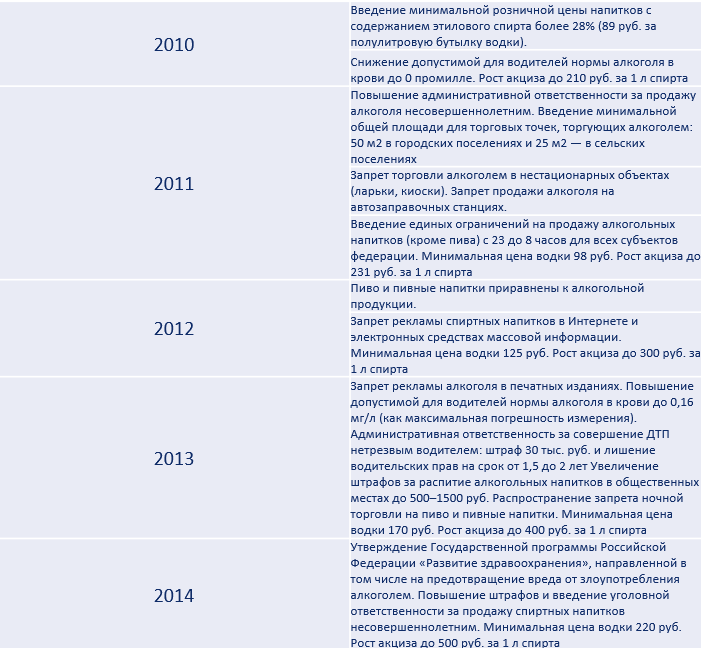

Соответственно, вводим 5 переменных, назовем группами законов от 1 до 5, для 2010-2014 годов соответсвенно

In [907]:
for i in range(1, 6):
    df['Группа законов_'+str(i)] = (df['Год']>=2009+i).apply(int)

In [908]:
df

,Регион,Год,Водка и ликеро-водочные изделия,Виноградные и плодовые вина,Коньяки,Шампанские и игристые вина,Пиво,Реальные денежные доходы населения,Группа законов_1,Группа законов_2,Группа законов_3,Группа законов_4,Группа законов_5
0,Российская Федерация,2003,12.747760,6.482281,0.670066,1.699421,93.853891,114.5,0,0,0,0,0
1,Российская Федерация,2004,12.444859,5.925798,0.614744,1.621856,84.312889,110.7,0,0,0,0,0
2,Российская Федерация,2005,12.507137,5.452121,0.536249,1.535000,79.432458,110.5,0,0,0,0,0
3,Центральный федеральный округ,2003,17.484328,7.129138,1.316064,2.885573,95.312205,116.0,0,0,0,0,0
4,Центральный федеральный округ,2004,16.628780,6.130596,1.095565,2.941544,84.888071,111.7,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,Еврейская автономная область,2021,6.107858,4.371548,0.879869,1.084583,72.095526,99.4,1,1,1,1,1
4828,Еврейская автономная область,2022,6.487787,3.606787,0.911519,1.066691,71.352112,98.2,1,1,1,1,1
4829,Чукотский автономный округ,2020,4.106364,4.719194,1.198060,1.760359,41.142800,105.2,1,1,1,1,1
4830,Чукотский автономный округ,2021,4.000917,4.209074,1.095312,1.727737,33.350446,107.3,1,1,1,1,1


# 2.  Визуализация

## Анализ данных на выбросы

Рассмотрим scatterplot'ы, чтобы посмотреть на выбросы

<Axes: xlabel='Год'>

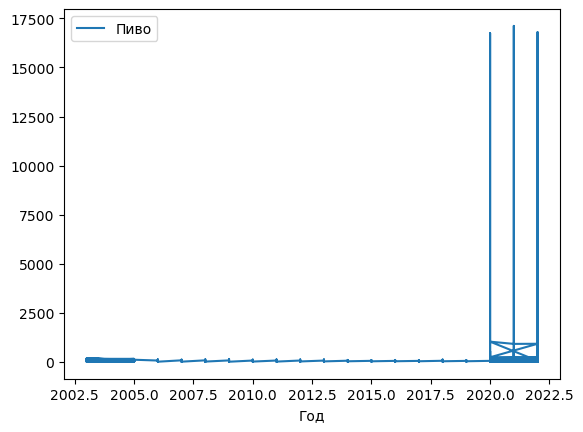

In [909]:
df.plot(x='Год', y ='Пиво')

На примере 'Пиво' видно, что с моим кодом для получения подушевого потребления на 2020-2022 годы что-то не так, и цифры улетают в космос. Честно говоря, я так и не смог понять, что не так с кодом, потому я просто выкину значения за пределами 3 медиан, потому как даже значение в 150 для пива слишком большое

In [910]:
list(df[df['Пиво']>5*df['Пиво'].median()]['Регион'].unique()) ## Большинство разбросов по трем регионам - выкинем их

['Свердловская область ',
 'Тюменская область без автономных округов',
 'Дальневосточный федеральный округ']

In [911]:
too_much = list(df[df['Пиво']>5*df['Пиво'].median()]['Регион'].unique())
for item in too_much:
    df = df.drop(df[df['Регион'] == item].index)


<Axes: xlabel='Год', ylabel='Пиво'>

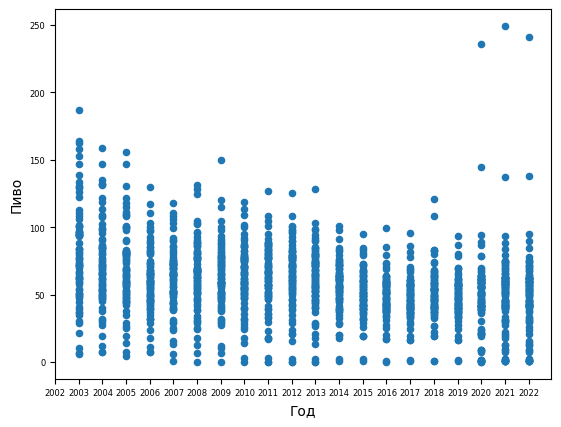

In [912]:
df.plot.scatter(x='Год', y ='Пиво', xticks=np.linspace(2002,2022, 21), fontsize=6)

<Axes: xlabel='Год', ylabel='Водка и ликеро-водочные изделия'>

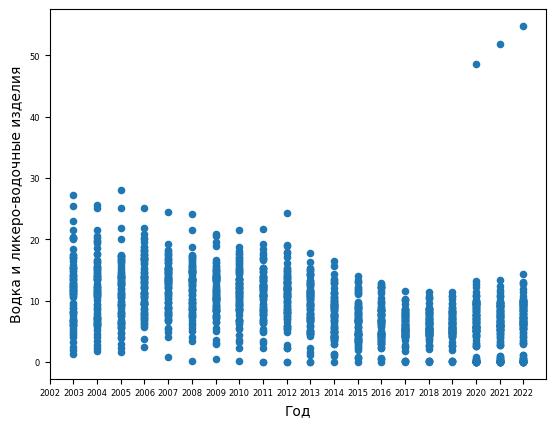

In [913]:
df.plot.scatter(x='Год', y ='Водка и ликеро-водочные изделия', xticks=np.linspace(2002,2022, 21), fontsize=6)

<Axes: xlabel='Год', ylabel='Виноградные и плодовые вина'>

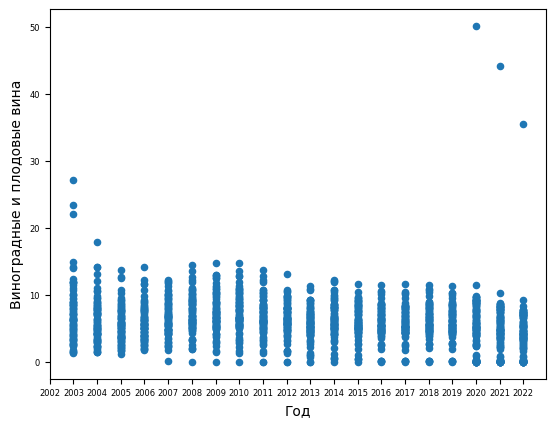

In [914]:
df.plot.scatter(x='Год', y ='Виноградные и плодовые вина', xticks=np.linspace(2002,2022, 21), fontsize=6)

<Axes: xlabel='Год', ylabel='Коньяки'>

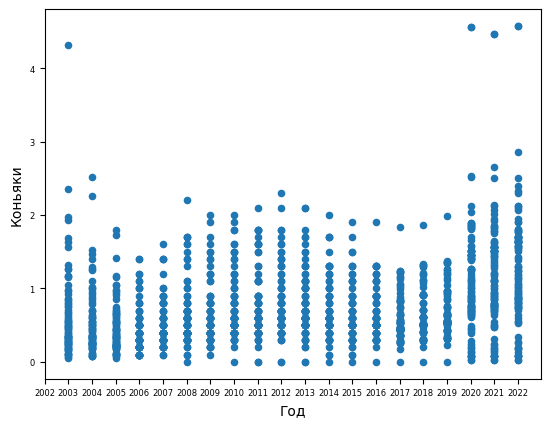

In [915]:
df.plot.scatter(x='Год', y ='Коньяки', xticks=np.linspace(2002,2022, 21), fontsize=6)

<Axes: xlabel='Год', ylabel='Шампанские и игристые вина'>

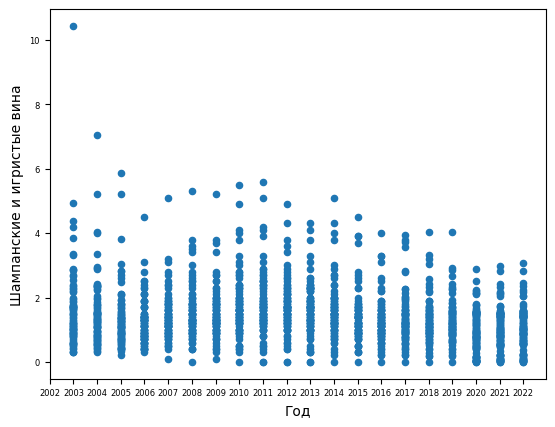

In [916]:
df.plot.scatter(x='Год', y ='Шампанские и игристые вина', xticks=np.linspace(2002,2022, 21), fontsize=6)

In [917]:
print(df['Виноградные и плодовые вина'].describe(), df['Коньяки'].describe(), df['Шампанские и игристые вина'].describe())

count    1757.000000
mean        6.095119
std         3.278118
min         0.000000
25%         4.434499
50%         5.900000
75%         7.822930
max        50.162280
Name: Виноградные и плодовые вина, dtype: float64 count    1757.000000
mean        0.744445
std         0.532919
min         0.000000
25%         0.400000
50%         0.600000
75%         0.962443
max         4.575855
Name: Коньяки, dtype: float64 count    1757.000000
mean        1.403062
std         0.863289
min         0.000000
25%         0.900000
50%         1.300000
75%         1.700000
max        10.431427
Name: Шампанские и игристые вина, dtype: float64


После удаления "странных" регионов данные стали выглядеть лучше, серьезных выбросов нет

## Рассмотрим регионы

Рассмотрим Российскую Федерацию в совокупности

<Axes: xlabel='Год'>

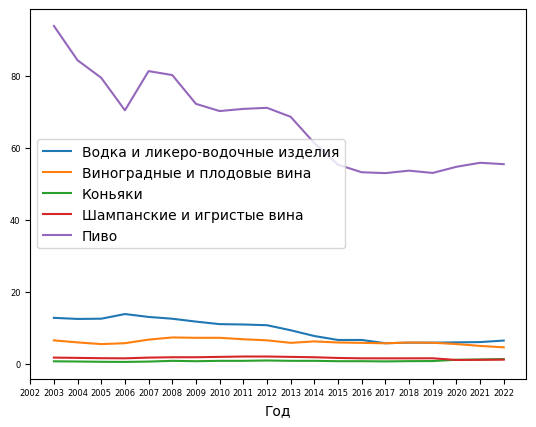

In [918]:
df.loc[df['Регион']=='Российская Федерация'].plot(x='Год', y=df.columns[2:-6], xticks=np.linspace(2002,2022, 21), fontsize=6)

<Axes: xlabel='Год'>

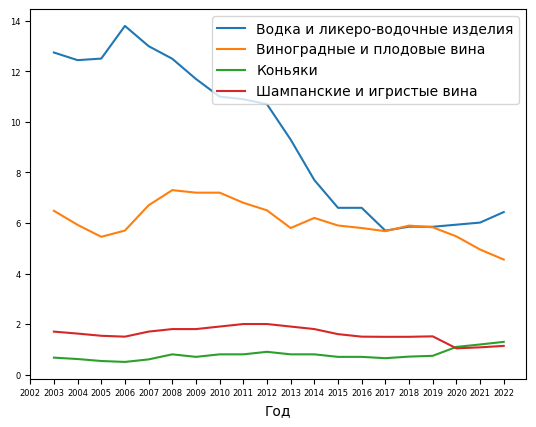

In [919]:
df.loc[df['Регион']=='Российская Федерация'].plot(x='Год', y=df.columns[2:-7], xticks=np.linspace(2002,2022, 21), fontsize=6)

По России за последние 20 лет происходит снижение потребления Пива, Водки и Вин, с небольшим подъемом в 20-х, возможно связанных с кризисами, примерно на одном уровне остается потребление Коньяка и Игристых вин

Теперь пройдемся по округам

In [920]:
okruga=[]
for item in list(df['Регион'].unique()):
    if 'федеральный' in item:
        okruga.append(item)

In [921]:
okruga

['Центральный федеральный округ',
 'Северо-Западный федеральный округ',
 'Южный федеральный округ',
 'Приволжский федеральный округ',
 'Уральский федеральный округ',
 'Сибирский федеральный округ']

<Axes: title={'center': 'Центральный федеральный округ'}, xlabel='Год'>

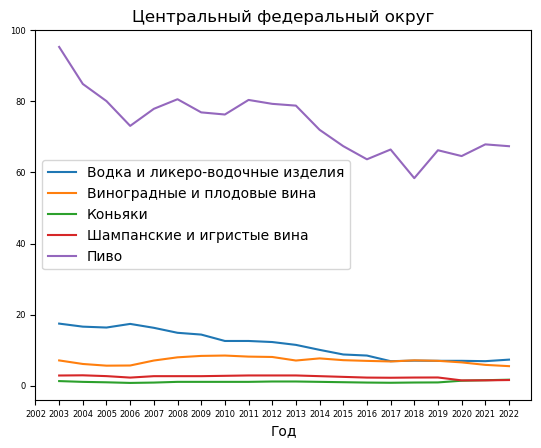

In [922]:
df.loc[df['Регион']==okruga[0]].plot(x='Год', y=df.columns[2:-6], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[0])

<Axes: title={'center': 'Центральный федеральный округ (без Пива)'}, xlabel='Год'>

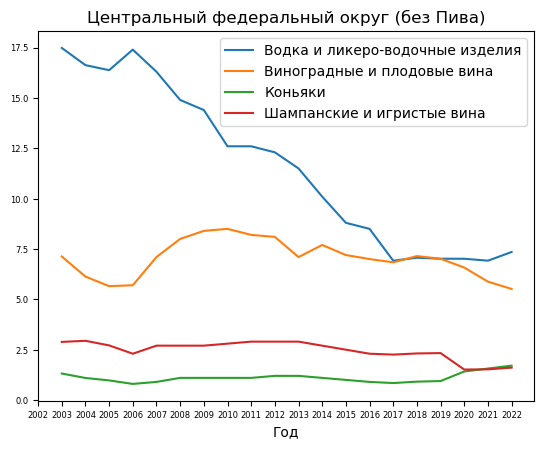

In [923]:
df.loc[df['Регион']==okruga[0]].plot(x='Год', y=df.columns[2:-7], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[0]+' (без Пива)')

<Axes: title={'center': 'Северо-Западный федеральный округ'}, xlabel='Год'>

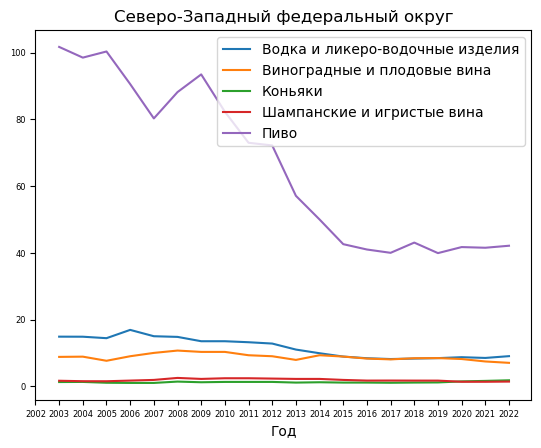

In [924]:
df.loc[df['Регион']==okruga[1]].plot(x='Год', y=df.columns[2:-6], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[1])


<Axes: title={'center': 'Северо-Западный федеральный округ (без Пива)'}, xlabel='Год'>

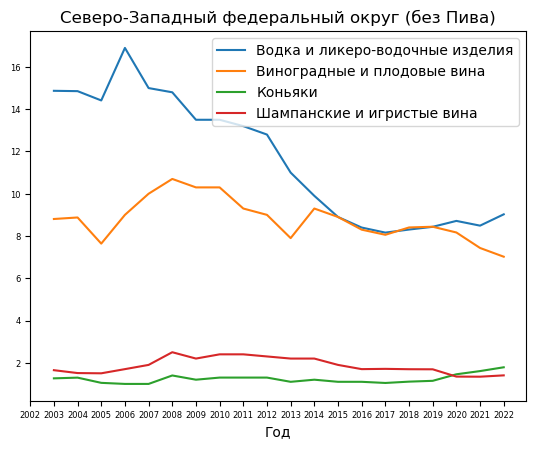

In [925]:
df.loc[df['Регион']==okruga[1]].plot(x='Год', y=df.columns[2:-7], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[1]+' (без Пива)')


<Axes: title={'center': 'Южный федеральный округ'}, xlabel='Год'>

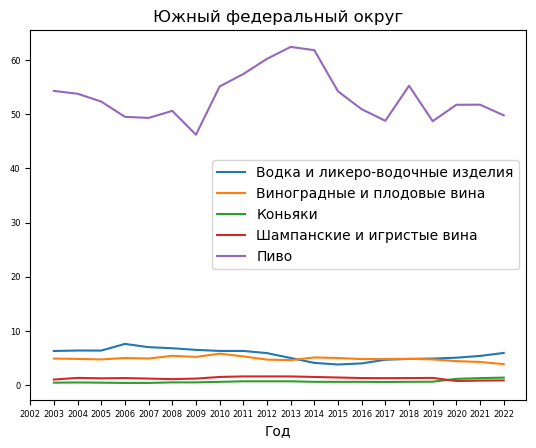

In [926]:
df.loc[df['Регион']==okruga[2]].plot(x='Год', y=df.columns[2:-6], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[2])

<Axes: title={'center': 'Южный федеральный округ (без Пива)'}, xlabel='Год'>

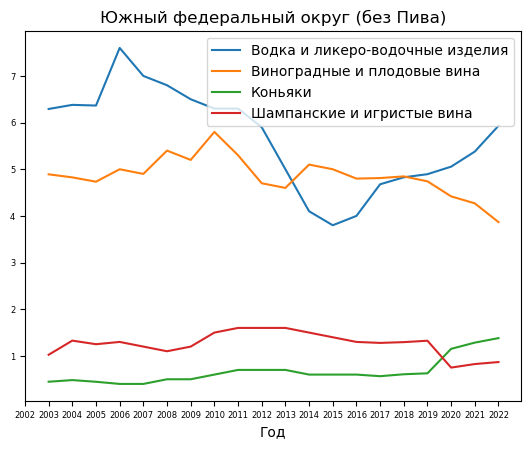

In [927]:
df.loc[df['Регион']==okruga[2]].plot(x='Год', y=df.columns[2:-7], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[2]+' (без Пива)')


<Axes: title={'center': 'Приволжский федеральный округ'}, xlabel='Год'>

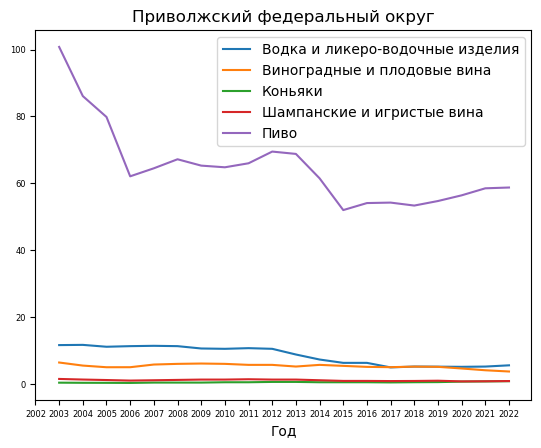

In [928]:
df.loc[df['Регион']==okruga[3]].plot(x='Год', y=df.columns[2:-6], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[3])


<Axes: title={'center': 'Приволжский федеральный округ (без Пива)'}, xlabel='Год'>

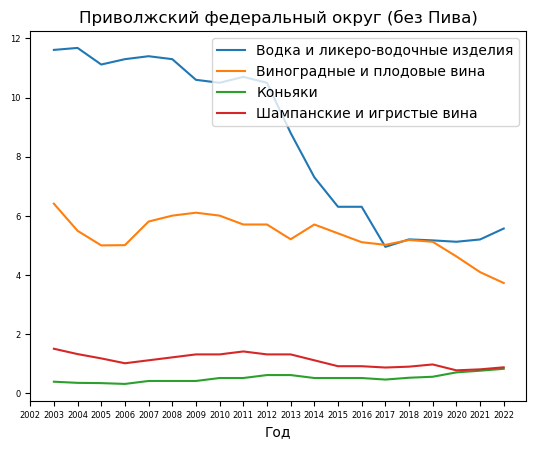

In [929]:
df.loc[df['Регион']==okruga[3]].plot(x='Год', y=df.columns[2:-7], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[3]+' (без Пива)')


<Axes: title={'center': 'Уральский федеральный округ'}, xlabel='Год'>

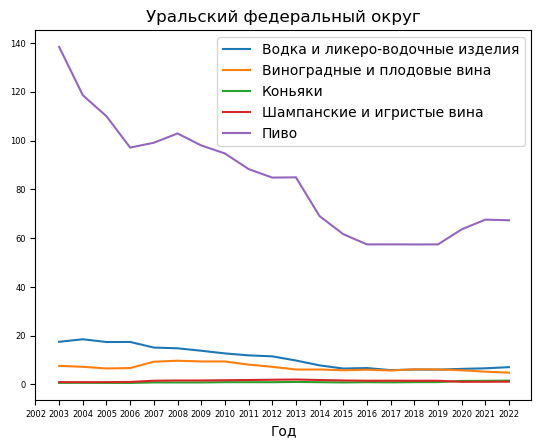

In [930]:
df.loc[df['Регион']==okruga[4]].plot(x='Год', y=df.columns[2:-6], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[4])


<Axes: title={'center': 'Уральский федеральный округ (без Пива)'}, xlabel='Год'>

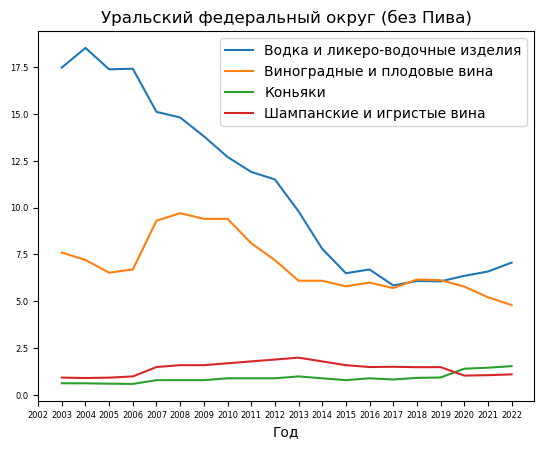

In [931]:
df.loc[df['Регион']==okruga[4]].plot(x='Год', y=df.columns[2:-7], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[4]+' (без Пива)')


<Axes: title={'center': 'Сибирский федеральный округ'}, xlabel='Год'>

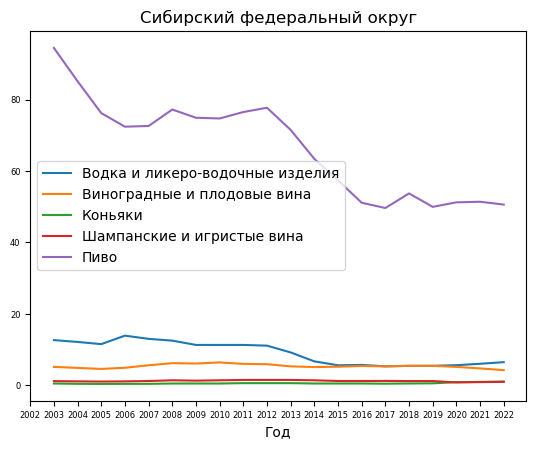

In [932]:
df.loc[df['Регион']==okruga[5]].plot(x='Год', y=df.columns[2:-6], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[5])


<Axes: title={'center': 'Сибирский федеральный округ (без Пива)'}, xlabel='Год'>

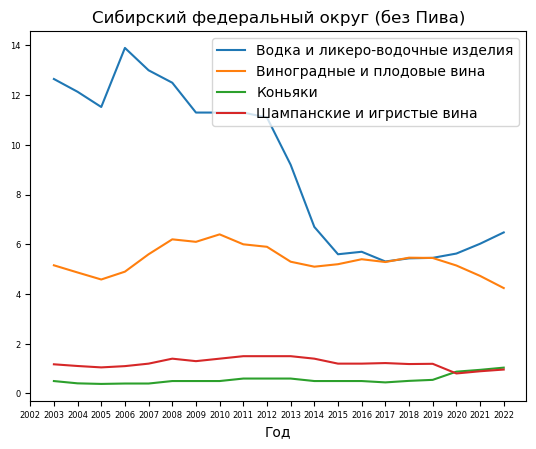

In [933]:
df.loc[df['Регион']==okruga[5]].plot(x='Год', y=df.columns[2:-7], xticks=np.linspace(2002,2022, 21), fontsize=6, title=okruga[5]+' (без Пива)')


По регионам тренды +- схожи, наблюдается снижение для водки, пива, и вин, коньяки немного повысились для некоторых округов, а шампанские как-будто расположены в виде параболы.

Добавим еще одну переменную - Суммарное подушевое потребление алкоголя, назовем ее Всего

In [934]:
df['Всего']=df[df.columns[2:7]].sum(axis=1)

<Axes: xlabel='Год'>

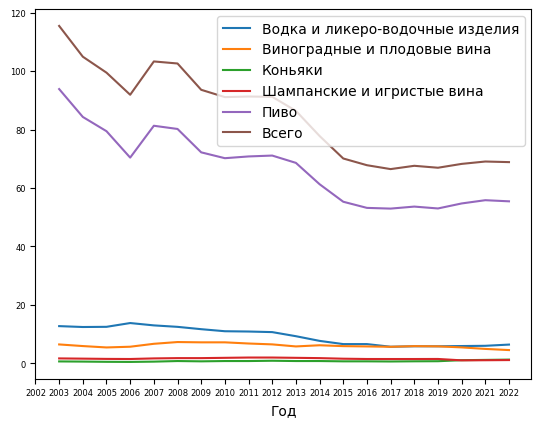

In [935]:
df.loc[df['Регион']=='Российская Федерация'].plot(x='Год', y=list(df.columns[2:-7])+['Всего'], xticks=np.linspace(2002,2022, 21), fontsize=6)

Визуально не очень отличается от Пива, потому смотреть разницу будем уже в регрессии

Для большинства графиков есть небольшой подъем в 20-х, предположительно - повлияли кризисы. Добавим еще одну качественную переменную, по аналогии с другими группами, так как тут два кризиса: Группа_К
Сюда же добавим мировой финансовый кризис (для России 2008-2010)

In [944]:
df['Группа_К'] = (df['Год']>=2020)
df['Группа_К'].loc[df[df['Год']<=2010][df['Год']>=2008]['Группа_К'].index] = True
df['Группа_К'] = df['Группа_К'].apply(int)

C:\Users\maxkh\AppData\Local\Temp\ipykernel_20160\2836242728.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['Группа_К'].loc[df[df['Год']<=2010][df['Год']>=2008]['Группа_К'].index] = True
C:\Users\maxkh\AppData\Local\Temp\ipykernel_20160\2836242728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Группа_К'].loc[df[df['Год']<=2010][df['Год']>=2008]['Группа_К'].index] = True


# 3. Гипотезы

0. Изменение объемов потребления
    H0 - Суммарное потребление алкоголя уменьшается
1. Изменение структуры потребления
    H1 - Потребление водки и коньяка уменьшилось по отношению к общему подушевому потреблению
2. Влияние роста доходов
    H2 - Повышение потребления доходов отрицательно линейно связано с потреблением алкоголя
3. Влияние мер антиалкогольной политики
    H3 - Меры антиалкогольной политики отрицательно линейно связаны с потреблением алкоголя
4. Влияние кризисов
    H4 - Кризисы имеют положительно линейную связь с потреблением алкоголя

### Проверка H0

Проверим с помощью построения линии тренда:


In [1092]:
##Воспользовался ChatGPT; prompt:'Как создать линию тренда для датафрейма'
def trendline(x, y, x_name='Год', y_name='Подушевое потребление', title='Всего'):

    coefs = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefs)
    trend_values = polynomial(x)
    std_d = np.std(y-trend_values)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label='Исходные данные')
    plt.plot(x, trend_values, color='red', label='Линия тренда')

    plt.fill_between(x, trend_values + std_d, trend_values - std_d, color='red', alpha=0.2, label='Разброс')
    plt.xticks(np.linspace(2002,2022, 21))
    plt.tick_params(axis='x', which='major', labelsize=6)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    return coefs

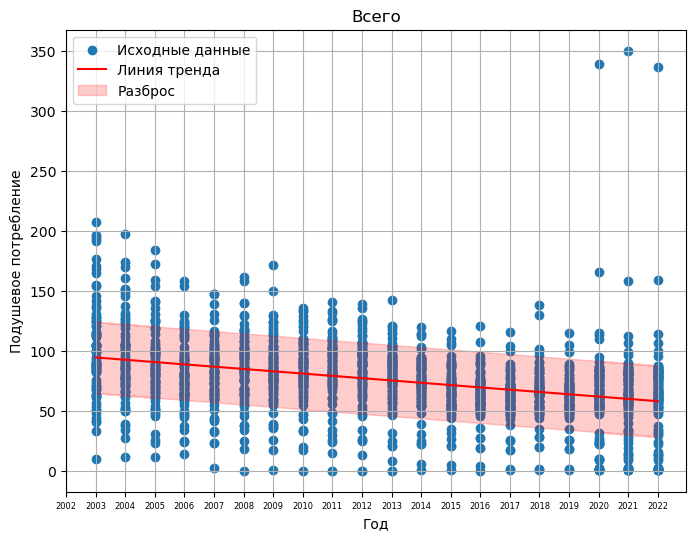

array([-1.91788113e+00,  3.93590366e+03])

In [1093]:
trendline(df['Год'], df['Всего'])

Тренд слабый, но есть и отрицательный, посмотрим для каждого вида алкоголя

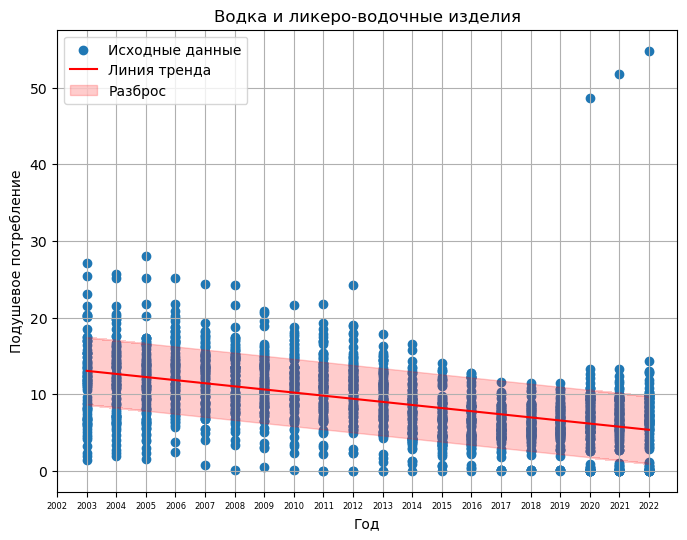

[-4.05091314e-01  8.24436698e+02]


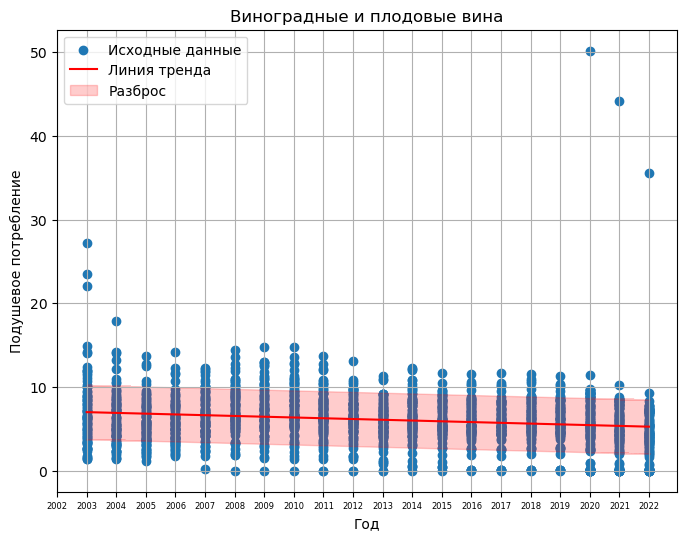

[-9.13082957e-02  1.89887909e+02]


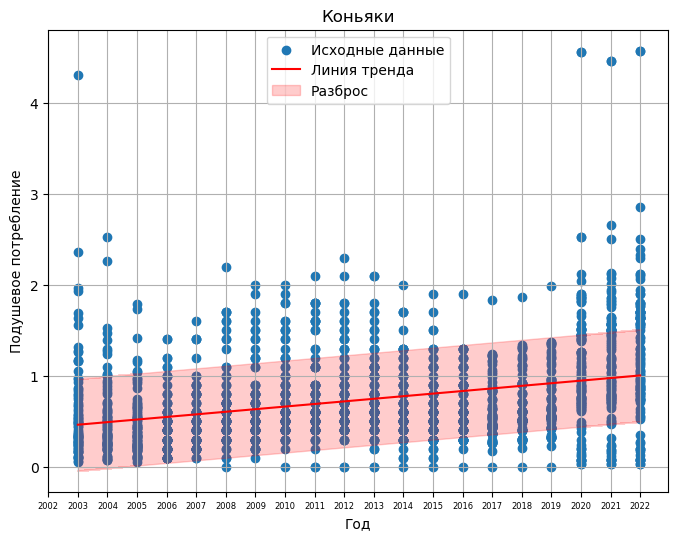

[ 2.85222677e-02 -5.66675034e+01]


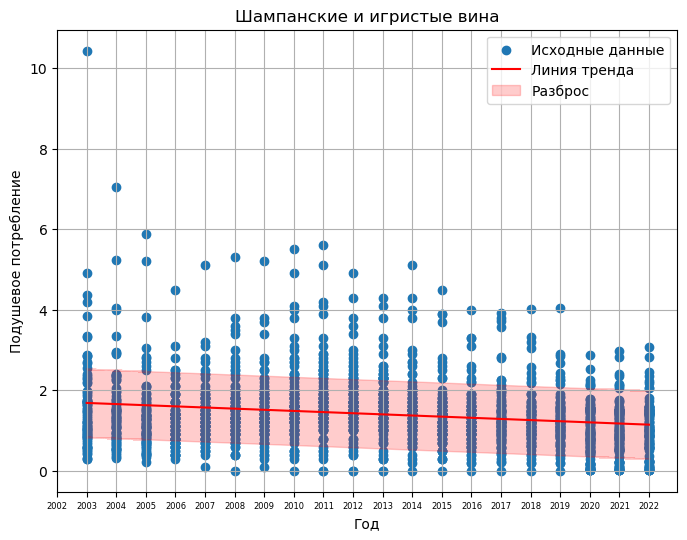

[-2.83863035e-02  5.85413302e+01]


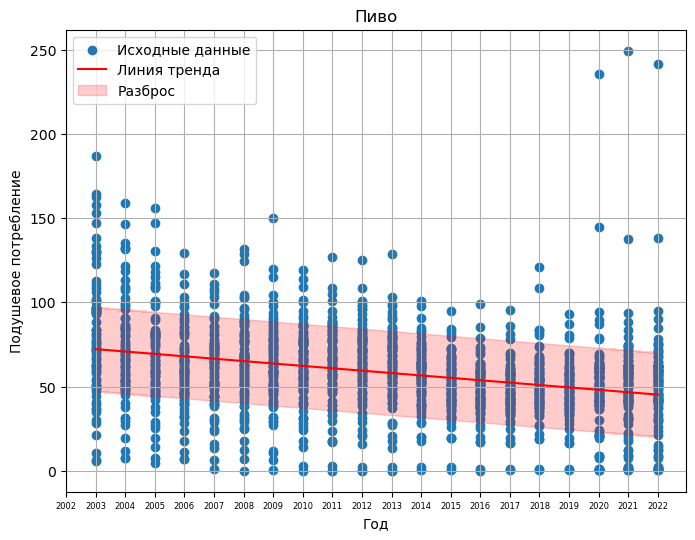

[-1.42161748e+00  2.91970522e+03]


In [1094]:
for item in df.columns[2:7]:
    print(trendline(df['Год'], df[item], title=str(item)))

Водка и Вино: тренд отрицательный, более сильный чем для общего потребления, для Шампанского и Вин - очень слабый, можно говорить о том, что потребление не меняется, для коньяка наоборот - тренд положительный.

Вывод: потребление падает в целом, но для некоторых видов алкоголя потребление не меняется, или даже растет, гипотеза H0 не отвергается, Кроме того H1 принимается, т.к заметно отчетливое падение водки и ликероводочных изделий, на фоне более слабого падения менее крепких напитков.

Перед проверкой остальных гипотез, построим матрицу корреляций, может из нее получится сделать выводы

In [1031]:
df.drop(columns='Регион', axis=1).corr()

,Год,Водка и ликеро-водочные изделия,Виноградные и плодовые вина,Коньяки,Шампанские и игристые вина,Пиво,Реальные денежные доходы населения,Группа законов_1,Группа законов_2,Группа законов_3,Группа законов_4,Группа законов_5,Всего,Группа_К
Год,1.000000,-0.475608,-0.163344,0.313863,-0.192828,-0.317000,-0.634302,0.820480,0.845201,0.861042,0.868133,0.866924,-0.354528,0.344029
Водка и ликеро-водочные изделия,-0.475608,1.000000,0.670247,0.241981,0.543873,0.524360,0.295308,-0.398226,-0.431702,-0.463649,-0.494460,-0.501135,0.680262,-0.051885
Виноградные и плодовые вина,-0.163344,0.670247,1.000000,0.286377,0.443984,0.484554,0.030839,-0.100886,-0.135058,-0.153214,-0.160732,-0.150536,0.627446,-0.024234
Коньяки,0.313863,0.241981,0.286377,1.000000,0.456411,0.202995,-0.183075,0.240725,0.235392,0.226468,0.214077,0.207226,0.265191,0.272621
Шампанские и игристые вина,-0.192828,0.543873,0.443984,0.456411,1.000000,0.422622,0.049499,-0.059246,-0.096593,-0.139627,-0.174310,-0.204908,0.516740,-0.113810
Пиво,-0.317000,0.524360,0.484554,0.202995,0.422622,1.000000,0.181916,-0.244837,-0.255083,-0.269809,-0.290266,-0.303364,0.976535,-0.078032
Реальные денежные доходы населения,-0.634302,0.295308,0.030839,-0.183075,0.049499,0.181916,1.000000,-0.610457,-0.606417,-0.555943,-0.598760,-0.609073,0.198761,-0.187992
Группа законов_1,0.820480,-0.398226,-0.100886,0.240725,-0.059246,-0.244837,-0.610457,1.000000,0.897379,0.808698,0.731780,0.660457,-0.273662,0.062033
Группа законов_2,0.845201,-0.431702,-0.135058,0.235392,-0.096593,-0.255083,-0.606417,0.897379,1.000000,0.901177,0.815463,0.735985,-0.292062,-0.084868
Группа законов_3,0.861042,-0.463649,-0.153214,0.226468,-0.139627,-0.269809,-0.555943,0.808698,0.901177,1.000000,0.904887,0.816693,-0.312497,-0.011991


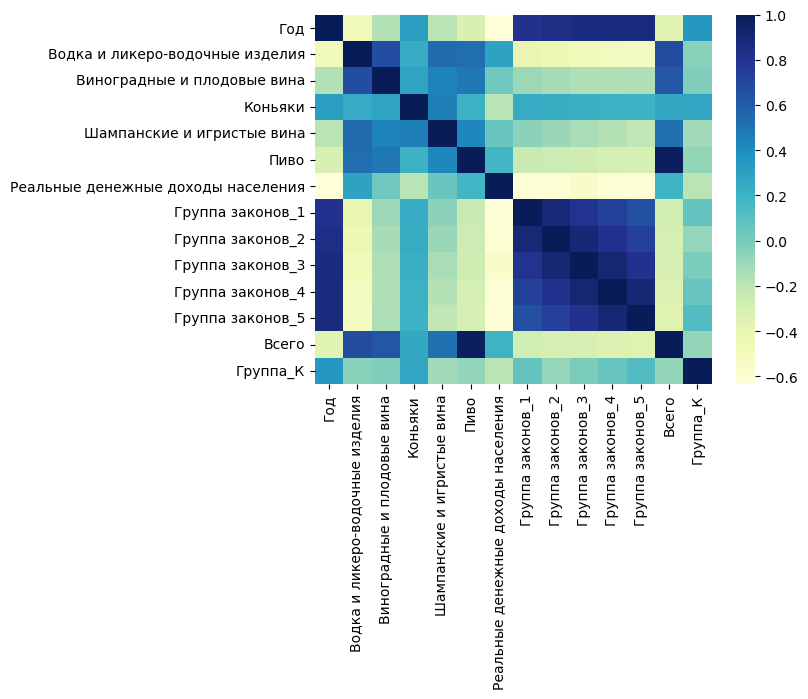

In [1030]:
dataplot = sb.heatmap(df.drop(columns='Регион', axis=1).corr(), cmap="YlGnBu", annot=False) 
plt.show()

С доходами лучше всего коррелирует водка, пиво, и всего, из законов видно, что отрицательно законы связаны с водкой, пивом и всего, а с коньяком связь наоборот - прямая.

Кроме того, H1 отвергется, т.к корреляция с менее крепкими напитками положительна

## Построение Регрессий

In [989]:
def find_RMSE(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [1065]:
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-100, 100], [-100, 100])
    plt.title('Train set', fontsize=20)
    
    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-100, 100], [-100, 100])
    plt.title('Test set', fontsize=20)
    plt.show()
    pass

In [1061]:
def train_l_r(x_train, x_test, y_train, y_test):
    y_mean = np.mean(y_train)             
    y_pred_naive = np.ones(len(y_test)) * y_mean
    RMSE_naive=find_RMSE(y_test, y_pred_naive)
    l_regression = LinearRegression()
    l_regression.fit(x_train, y_train)
    y_pred_regr = l_regression.predict(x_test)
    RMSE = find_RMSE(y_test, y_pred_regr)
    plot_yreal_ypred(y_test, y_train, l_regression.predict(x_test), l_regression.predict(x_train))
    plot_yreal_ypred(y_test, y_train, y_pred_naive, np.ones(len(y_train))*np.mean(y_train))
    print(f"RMSE:{RMSE}, RMSE_naive:{RMSE_naive}")
    return l_regression

In [1119]:
x_ses = list([df.columns[1]])+list(df.columns[7:-2])+list([df.columns[-1]])
y_ = list(df.columns[2:7])

In [1086]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=13)

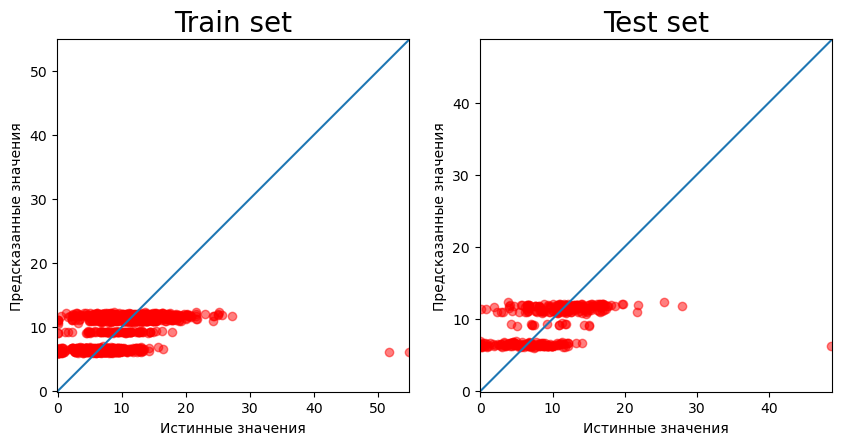

RMSE:4.530947255589931, RMSE_naive:5.258520437077058
[-0.04790291 -0.02806799 -0.51568457 -0.38840781  0.34854912 -1.88368709
 -2.68472665 -0.09381633]


D:\Conda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


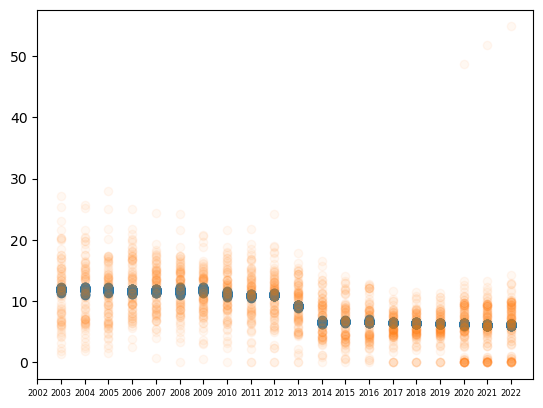

In [1106]:
y_train = df_train[y_[0]].to_numpy()
y_test = df_test[y_[0]].to_numpy()

x_train = df_train[x_ses].to_numpy()
x_test = df_test[x_ses].to_numpy()
l_r = train_l_r(x_train, x_test, y_train, y_test)
print(l_r.coef_)
plt.scatter(df['Год'], l_r.predict(df[x_ses]))
plt.scatter(df['Год'], df[y_[0]], alpha=0.05)
plt.xticks(np.linspace(2002,2022, 21))
plt.tick_params(axis='x', which='major', labelsize=6)
plt.show()

H2: Коэффициент околонулевой, несмотря на отсутствие масштабирования, (однако большинство показателей около единицы, так что это не должно влиять), причем меньше нуля, то есть либо он практически не влияет, либо влияет отрицательно 
Вывод: H2 для Водки отвергается

H3: Все группы влияют достаточно сильно, причем все, кроме Группы_2012, влияют отрицательно, то есть введение мер(либо чего-то другого, произошедшего в этих годах) уменьшило потребление водки. За групой в 2012 идет самый большой (по модулю) коэффициент, т.е возможно произошедшие в 2012 году события, не связанные с законами, временно подняли потребление. Кроме того, самая первая группа законов затрагивала именно крепкий алкоголь и имеет неплохой коэффициент. 
Вывод: H3 для Водки принимается

H4: Коэффициент слабый, вряд ли можно говорить о линейной связи
Вывод: H4 для Водки отвергается

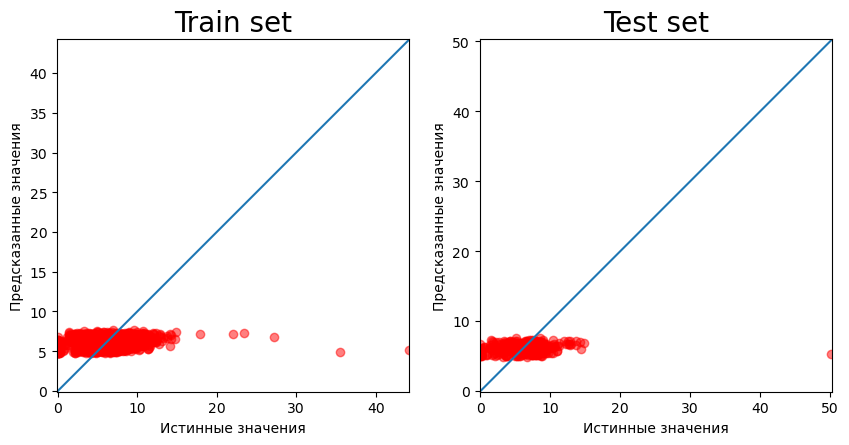

RMSE:3.7374943481584646, RMSE_naive:3.776426074851303
[-0.18814791 -0.04216295  0.81788926 -0.21601224  0.15653889 -0.55437282
  0.58696184  0.14583483]


D:\Conda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


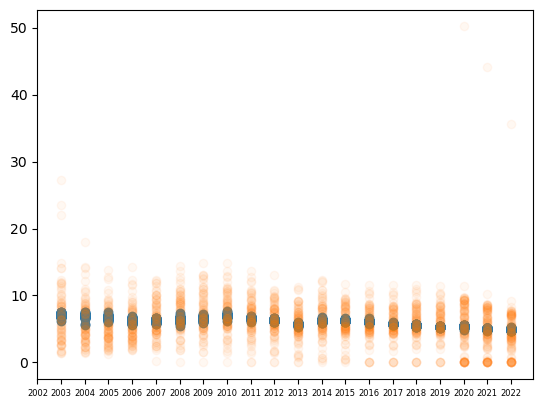

In [1107]:
y_train = df_train[y_[1]].to_numpy()
y_test = df_test[y_[1]].to_numpy()

x_train = df_train[x_ses].to_numpy()
x_test = df_test[x_ses].to_numpy()
l_r = train_l_r(x_train, x_test, y_train, y_test)
print(l_r.coef_)
plt.scatter(df['Год'], l_r.predict(df[x_ses]))
plt.scatter(df['Год'], df[y_[1]], alpha=0.05)
plt.xticks(np.linspace(2002,2022, 21))
plt.tick_params(axis='x', which='major', labelsize=6)
plt.show()

H2: Коэффициент околонулевой, несмотря на отсутствие масштабирования, (однако большинство показателей около единицы, так что это не должно влиять), причем меньше нуля, то есть либо он практически не влияет, либо влияет отрицательно 
Вывод: H2 для Вина отвергается

H3: Часть коэффициентов положительна, часть отрицательна, и довольно сильна. Либо происходило замещение потребления других напитков, либо законы не влияли. В любом случае нельзя говорить о отрицательной линейной связи
Вывод: H3 для Вина отвергается

H4: Коэффициент слабый и положительный, нельзя говорить об отрицательной линейной связи
Вывод: H4 для Вина отвергается

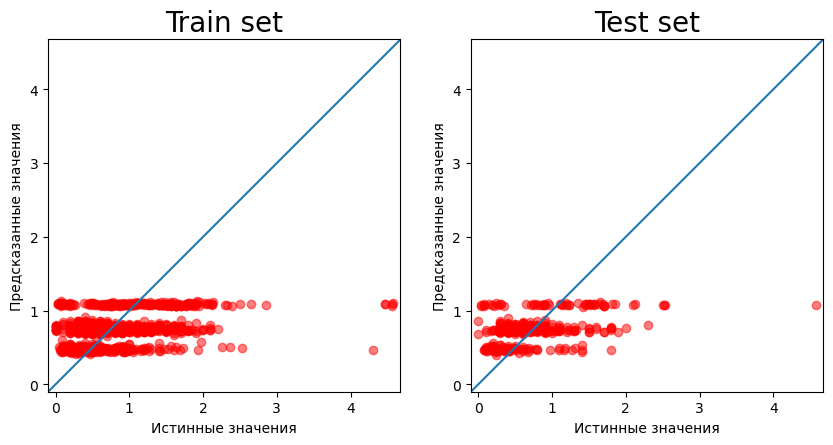

RMSE:0.48523656510161983, RMSE_naive:0.5305386583349476
[-0.00042048  0.00427253 -0.07565912  0.39146656  0.02396793 -0.02455005
 -0.00762994  0.35804505]


D:\Conda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


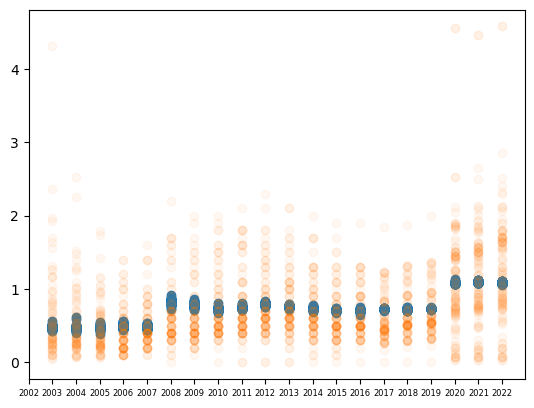

In [1108]:
y_train = df_train[y_[2]].to_numpy()
y_test = df_test[y_[2]].to_numpy()

x_train = df_train[x_ses].to_numpy()
x_test = df_test[x_ses].to_numpy()
l_r = train_l_r(x_train, x_test, y_train, y_test)
print(l_r.coef_)
plt.scatter(df['Год'], l_r.predict(df[x_ses]))
plt.scatter(df['Год'], df[y_[2]], alpha=0.05)
plt.xticks(np.linspace(2002,2022, 21))
plt.tick_params(axis='x', which='major', labelsize=6)
plt.show()

Коньяки при визуализации не особо менялись по годам, так что скорее всего связи не будет
H2: Коэффициент околонулевой, скорее всего связи нет
Вывод: H2 для Коньяка отвергается

H3: Самая первая группа законов повлияла негативно, но коэффициент околонулевой, важна эта группа тем, что там вводился запрет именно на крепкие напитки, остальные либо околонулевые, либо положительные.
Вывод: H3 для Коньяка отвергается

H4: Коэффициент положительный, нельзя говорить об отрицательной линейной связи
Вывод: H4 для Коньяка отвергается

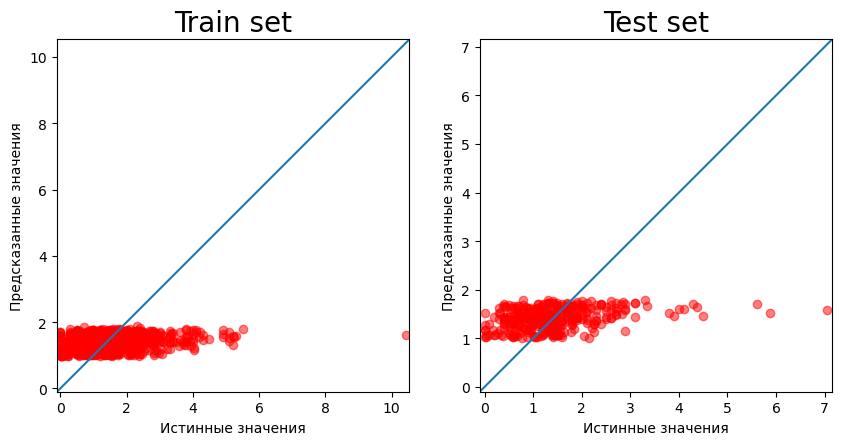

RMSE:0.8561512193326033, RMSE_naive:0.9042452248457857
[-0.05366818 -0.00936728  0.43588797 -0.04466119  0.09405603 -0.03941779
 -0.13297222 -0.01176079]


D:\Conda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


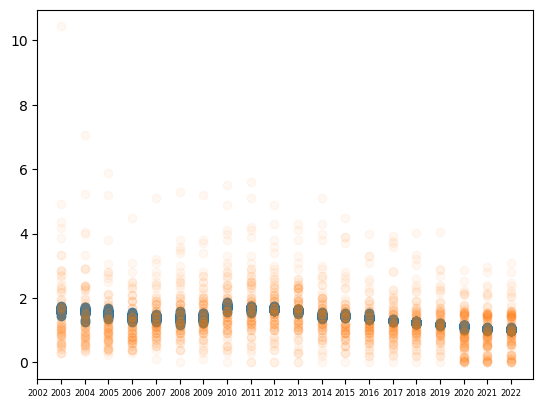

In [1109]:
y_train = df_train[y_[3]].to_numpy()
y_test = df_test[y_[3]].to_numpy()

x_train = df_train[x_ses].to_numpy()
x_test = df_test[x_ses].to_numpy()
l_r = train_l_r(x_train, x_test, y_train, y_test)
print(l_r.coef_)
plt.scatter(df['Год'], l_r.predict(df[x_ses]))
plt.scatter(df['Год'], df[y_[3]], alpha=0.05)
plt.xticks(np.linspace(2002,2022, 21))
plt.tick_params(axis='x', which='major', labelsize=6)
plt.show()

H2: Коэффициент околонулевой, скорее всего связи нет
Вывод: H2 для Шампанских отвергается

H3: Если тут и есть отрицательные коэффициенты, то они околонулевые, потому о связи навряд ли можно говорить. Возможно это связано что шампанские и игристые вина больше связаны с праздниками и подарками, а не чрезмерным потреблением, потому законы особо не повлияли
Вывод: H3 для Шампанских отвергается

H4: Коэффициент околонулевой, нельзя говорить об отрицательной линейной связи
Вывод: H4 для Шампанских отвергается

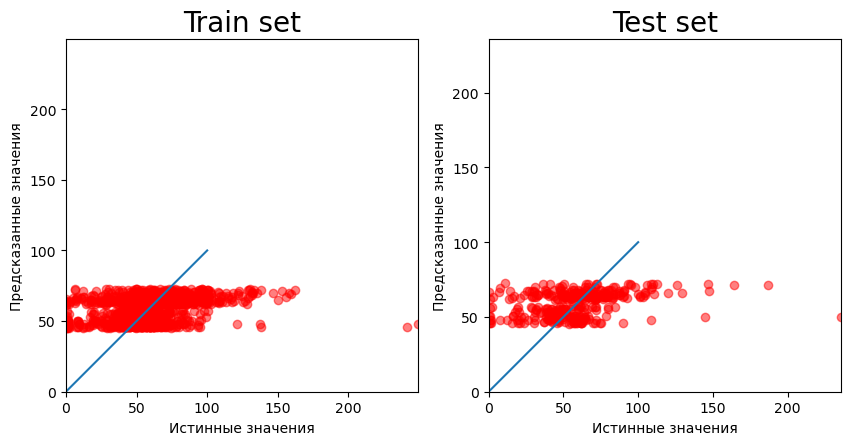

RMSE:27.09373092030584, RMSE_naive:28.567531465059798
[-2.12991929 -0.08441906  0.31006891  8.53030981  1.21978223  0.62759381
 -3.24339996  5.76108583]


D:\Conda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


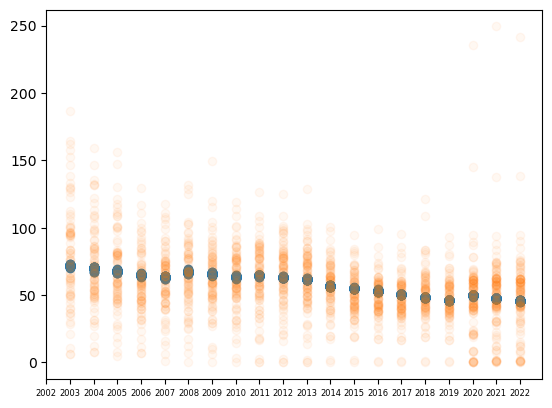

In [1110]:
y_train = df_train[y_[4]].to_numpy()
y_test = df_test[y_[4]].to_numpy()

x_train = df_train[x_ses].to_numpy()
x_test = df_test[x_ses].to_numpy()
l_r = train_l_r(x_train, x_test, y_train, y_test)
print(l_r.coef_)
plt.scatter(df['Год'], l_r.predict(df[x_ses]))
plt.scatter(df['Год'], df[y_[4]], alpha=0.05)
plt.xticks(np.linspace(2002,2022, 21))
plt.tick_params(axis='x', which='major', labelsize=6)
plt.show()

H2: Коэффициент околонулевой, скорее всего связи нет
Вывод: H2 для Пива отвергается

H3: Почти все коэффициенты положительные, возможно происходило замещение потребления вместо крепкого алкоголя, либо другие события влияли сильнее в эти годы, однако мы не можем принимать данную гипотезу
Вывод: H3 для Пива отвергается

H4: Коэффициент двольно высокий для бинарной переменной, можно говорить о том, что во время кризисов повышается потребление пива, возможно из-за ухудшения ситуации вокруг людей.
Вывод: H4 для Пива принимается

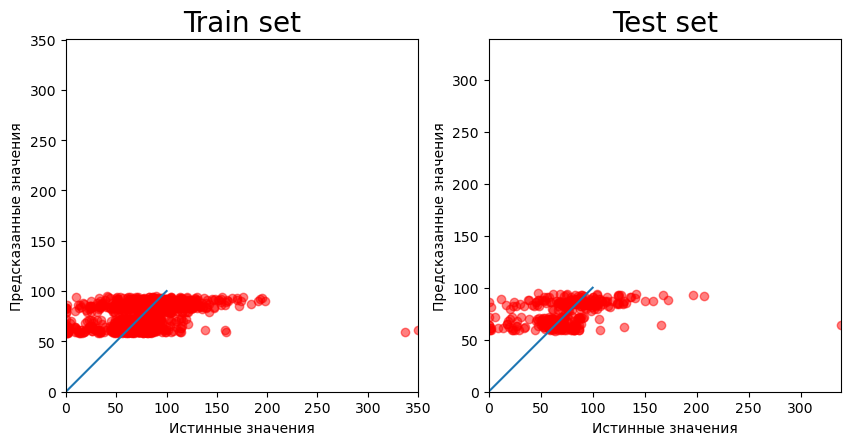

RMSE:31.838457100828133, RMSE_naive:34.12652144756768
[-2.42005879 -0.15974474  0.97250244  8.27269513  1.8428942  -1.87443394
 -5.48176694  6.15938858]


D:\Conda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


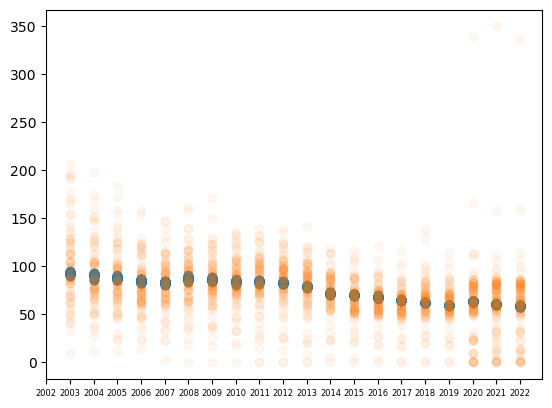

In [1120]:
y_train = df_train['Всего'].to_numpy()
y_test = df_test['Всего'].to_numpy()

x_train = df_train[x_ses].to_numpy()
x_test = df_test[x_ses].to_numpy()
l_r = train_l_r(x_train, x_test, y_train, y_test)
print(l_r.coef_)
plt.scatter(df['Год'], l_r.predict(df[x_ses]))
plt.scatter(df['Год'], df['Всего'], alpha=0.05)
plt.xticks(np.linspace(2002,2022, 21))
plt.tick_params(axis='x', which='major', labelsize=6)
plt.show()

Выводы для Общего потребления схожи, что связано с большой долей пива в общем потреблении

H2: Коэффициент околонулевой, скорее всего связи нет
Вывод: H2 для Общего потребления отвергается

H3: Почти все коэффициенты положительные, возможно происходило замещение потребления вместо крепкого алкоголя, либо другие события влияли сильнее в эти годы, однако мы не можем принимать данную гипотезу
Вывод: H3 для Общего потребления отвергается

H4: Коэффициент двольно высокий для бинарной переменной, можно говорить о том, что во время кризисов повышается потребление пива, возможно из-за ухудшения ситуации вокруг людей.
Вывод: H4 для Общего потребления принимается

### Вывод

Потребление снижается почти для каждого вида алкоголя(кроме Коньяков, но они занимают малую долю), кроме того, не замечено снижение потребление крепких напитков относительно менее крепких. Для всех видов алкоголя не найдено линейной зависимости от темпов роста денежного дохода. Влияние мер антиалкоголной политики замечено в линейной связи только на водку. Гипотеза о влиянии была принята лишь для пива и общего потребления(из-за большей части, приходящейся на пиво), и можно предположить о том, что кризисы влияют негативно на потребление пива, т.е его повышают.